# TASK - 04

- Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train_data = pd.read_csv("twitter_training.csv")
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data_val = pd.read_csv("twitter_validation.csv")
data_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
train_data.columns = ['id', 'game', 'sentiment', 'text']
data_val.columns = ['id', 'game', 'sentiment', 'text']

In [6]:
train_data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [7]:
train_data.head()

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
train_data.game.value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [9]:
data_val.head()

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [10]:
data_val.game.value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [11]:
train_data.isnull().sum()

id             0
game           0
sentiment      0
text         686
dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   game       74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
id_types = train_data['id'].value_counts()
id_types

5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: id, Length: 12447, dtype: int64

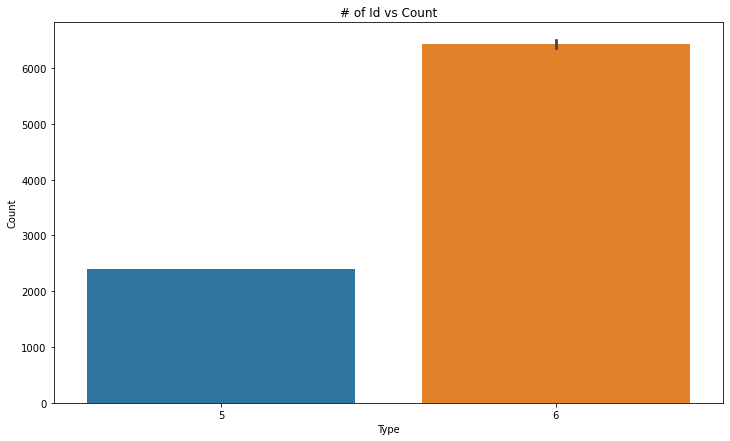

In [14]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [15]:
game_types = train_data['game'].value_counts()
game_types

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

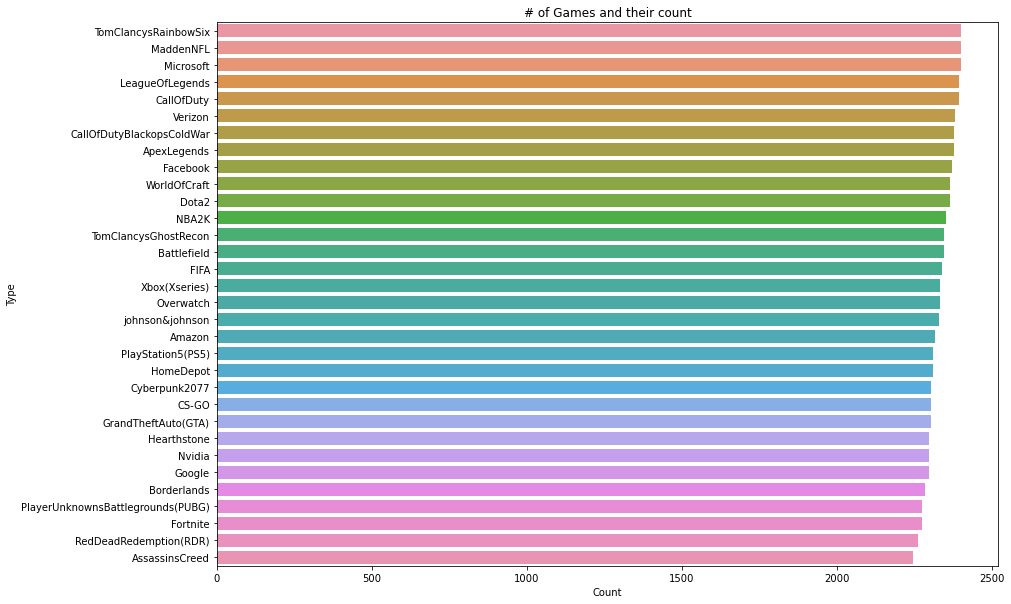

In [16]:
plt.figure(figsize=(14,10))
sns.barplot(x=game_types.values,y=game_types.index)
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')
plt.show()

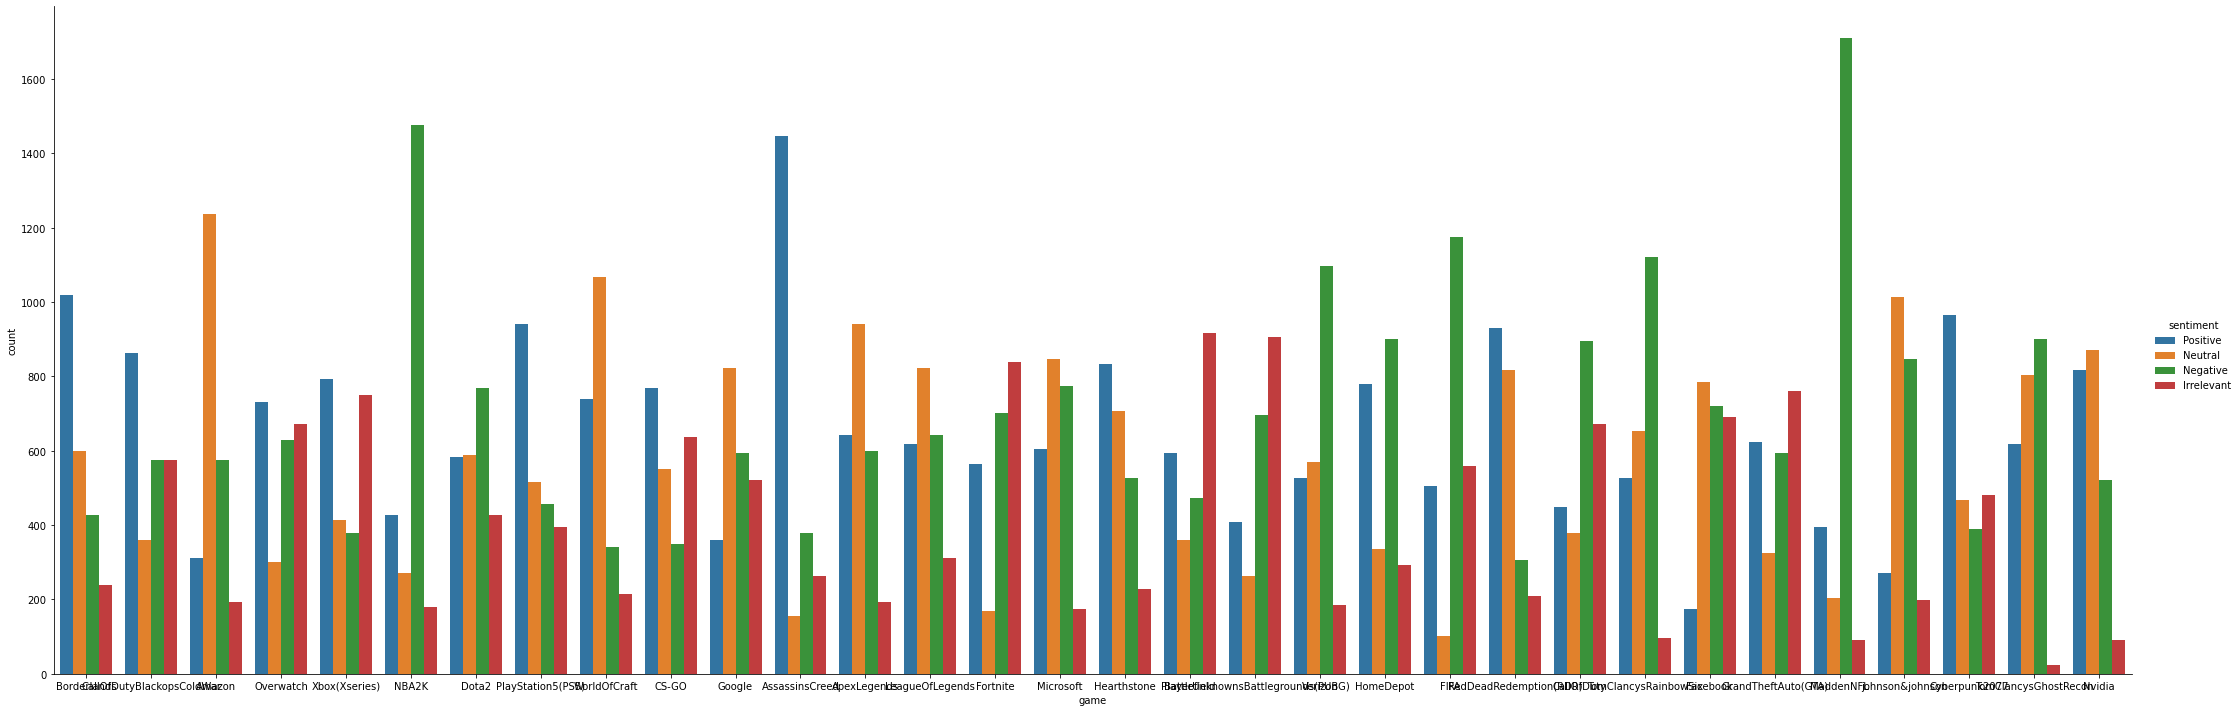

In [17]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=train_data)
plt.show()

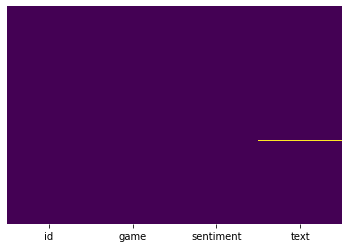

In [18]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [19]:
total_null=train_data.isnull().sum().sort_values(ascending=False)
percent = ((train_data.isnull().sum()/train_data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", train_data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  74681


,Total Missing,In Percent
text,686,0.92
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [20]:
train_data.dropna(subset=['text'],inplace=True)
total_null=train_data.isnull().sum().sort_values(ascending=False)
percent = ((train_data.isnull().sum()/train_data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", train_data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [21]:
train0=train_data[train_data['sentiment']=="Negative"]
train1=train_data[train_data['sentiment']=="Positive"]
train2=train_data[train_data['sentiment']=="Irrelevant"]
train3=train_data[train_data['sentiment']=="Neutral"]

In [22]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [23]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [24]:
train0.shape, train1.shape, train2.shape, train3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [25]:
traindata=pd.concat([train0,train1,train2,train3],axis=0)
train_data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [26]:
id_types = traindata['id'].value_counts()
id_types

2405    6
1810    6
1748    6
1754    6
1760    6
       ..
1602    3
1880    3
333     3
9388    2
9267    2
Name: id, Length: 1040, dtype: int64

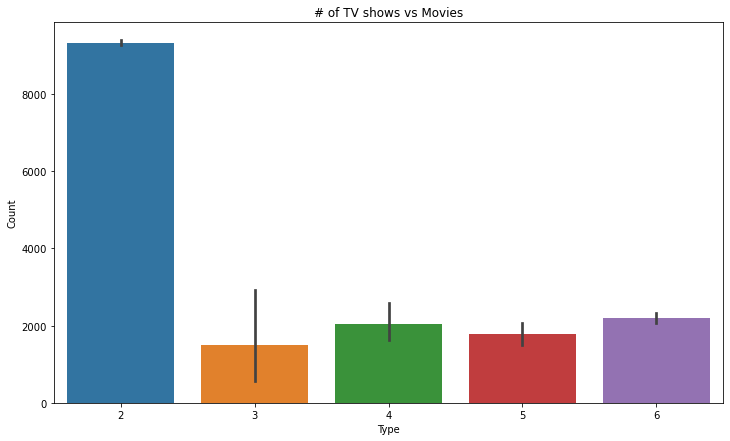

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [28]:
game_types = traindata['game'].value_counts()
game_types

Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: game, dtype: int64

In [29]:
sentiment_types = train_data['sentiment'].value_counts()
sentiment_types

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64

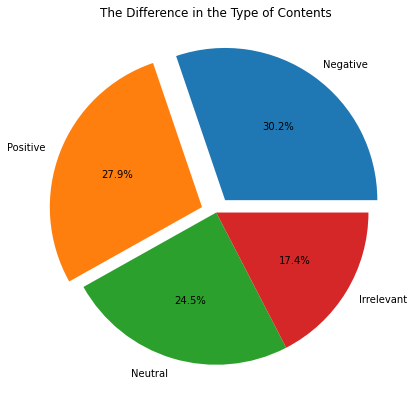

In [30]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

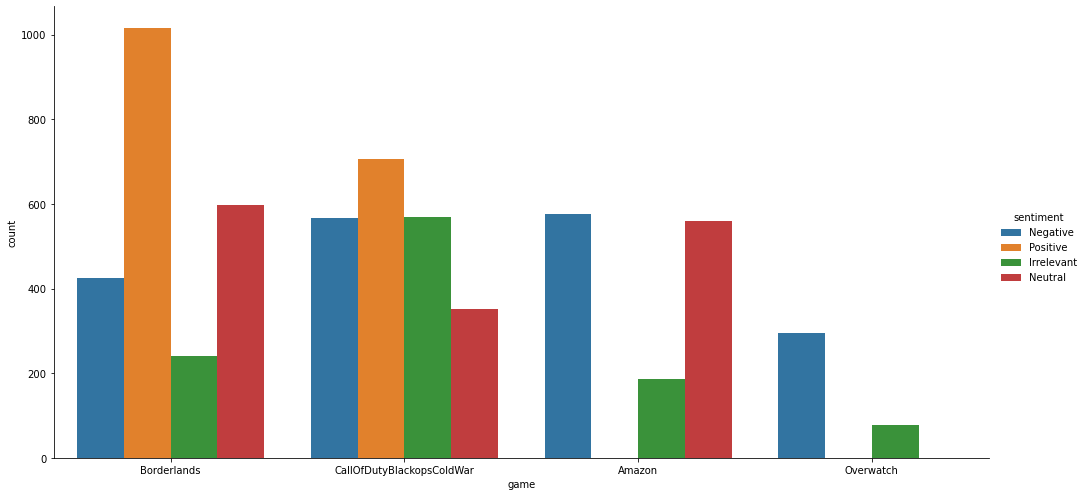

In [31]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=traindata)
plt.show()

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [33]:
train_data['sentiment']=label_encoder.fit_transform(train_data['sentiment'])
train_data['game']=label_encoder.fit_transform(train_data['game'])
data_val['sentiment']=label_encoder.fit_transform(data_val['sentiment'])
data_val['game']=label_encoder.fit_transform(data_val['game'])

In [34]:
train_data = train_data.drop(['id'],axis=1)
train_data

,game,sentiment,text
0,4,3,I am coming to the borders and I will kill you...
1,4,3,im getting on borderlands and i will kill you ...
2,4,3,im coming on borderlands and i will murder you...
3,4,3,im getting on borderlands 2 and i will murder ...
4,4,3,im getting into borderlands and i can murder y...
...,...,...,...
74676,21,3,Just realized that the Windows partition of my...
74677,21,3,Just realized that my Mac window partition is ...
74678,21,3,Just realized the windows partition of my Mac ...
74679,21,3,Just realized between the windows partition of...
